In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#load breast cancer data from sklearn
breast_cancer_data = load_breast_cancer()

Before jumping into creating our classifier, let’s take a look at the data. Begin by printing breast_cancer_data.data[0]. That’s the first datapoint in our set. But what do all of those numbers represent? Let’s also print breast_cancer_data.feature_names.

In [11]:
data1 = breast_cancer_data.data[0]
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We now have a sense of what the data looks like, but what are we trying to classify? Let’s print both breast_cancer_data.target and breast_cancer_data.target_names.

Was the very first data point tagged as malignant or benign?

In [12]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Call the train_test_split function. It takes several parameters:

The data you want to split (for us breast_cancer_data.data)
The labels associated with that data (for us, breast_cancer_data.target).
The test_size. This is what percentage of your data you want to be in your testing set. Let’s use test_size = 0.2
random_state. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used random_state = 100.

In [13]:
training_data,validation_data,training_labels,validation_labels = train_test_split(breast_cancer_data.data,breast_cancer_data.target,test_size=.2,random_state=100)
print(len(training_data),len(training_labels))

455 455


Create a KNeighborsClassifier where n_neighbors = 3. Name the classifier classifier.

In [14]:
classifier = KNeighborsClassifier(n_neighbors=3)

Train your classifier using the fit function. This function takes two parameters: the training set and the training labels.

In [15]:
classifier.fit(training_data,training_labels)

KNeighborsClassifier(n_neighbors=3)


Now that the classifier has been trained, let’s find how accurate it is on the validation set. Call the classifier’s score function. score takes two parameters: the validation set and the validation labels. Print the result!

In [16]:
classifier.score(validation_data,validation_labels)

0.9473684210526315

The classifier does pretty well when k = 3. But maybe there’s a better k! Put the previous 3 lines of code inside a for loop. The loop should have a variable named k that starts at 1 and increases to 100. Rather than n_neighbors always being 3, it should be this new variable k.

You should now see 100 different validation accuracies print out. Which k seems the best?

In [19]:
scores = []
for i in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(training_data,training_labels)
    scores.append(classifier.score(validation_data,validation_labels))

We now have the validation accuracy for 100 different ks. Rather than just printing it out, let’s make a graph using matplotlib. Begin by importing matplotlib.pyplot as plt.
The x-axis should be the values of k that we tested. This should be a list of numbers between 1 and 100. You can use the range function to make this list. Store it in a variable named k_list.

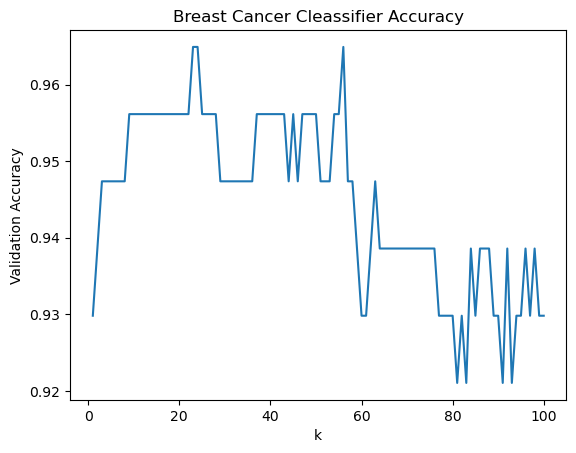

In [20]:
X = range(1,101)
plt.plot(X,scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Cleassifier Accuracy')
plt.show()